## Credit Card Retention Analysis
**Dataset Description**

A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really like to understand what characteristics lend themselves to someone who is going to churn so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction.

This dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.

16.07% of customers have churned.


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objs as go
from plotly.offline import iplot
sns.set()
pd.options.display.max_columns = 999

In [15]:
data = pd.read_csv('E:\Envision\python_Project\Bank Churn_CreditCardRetension\DataSet\BankChurners.csv')

In [16]:
data.shape

(10127, 23)

In [17]:
data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3       12691.0                  777          11914.0   
1                      2        8256.0                  864           7392.0   
2                      0        3418.0                    0           3418.0   
3                      1        3313.0                 2517            796.0   
4                      0        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998

In [18]:
data['CLIENTNUM'].nunique()

10127

In [19]:
data.drop_duplicates(inplace=True)

In [20]:
data.shape

(10127, 23)

### Subsetting Data

In [21]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

We will likely not need the naive bayes classifiers that they've created, so for simplicity, we will subset to remove them with the following code:

In [22]:
data = data[['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',]]

In [23]:
data.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

## Missing Values

Next we will check for `NULL` or missing values in the dataset. We can check this with a simple one-liner. By running the below code, we see that `Education Level` has 1519 instances of missing vlaues, `Marital Status` has 749 and `Income Category` has 1112. Since these are categorical variables, we can replace the null values with `Unknown`. However, if we were dealing with numerical missing values, we would likely impute (or fill in) the missing records with a mean or median. 

A more in-depth review of how to handle different types of missing values is [here](https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b). 

Let's replace these missing records! 

In [24]:
data.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [25]:
data[data['Education_Level'].isna()]

Empty DataFrame
Columns: [CLIENTNUM, Attrition_Flag, Customer_Age, Gender, Dependent_count, Education_Level, Marital_Status, Income_Category, Card_Category, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio]
Index: []

In [26]:
data['Education_Level'] = data['Education_Level'].fillna('Unknown')
data['Marital_Status'] = data['Marital_Status'].fillna('Unknown')
data['Income_Category'] = data['Income_Category'].fillna('Unknown')

In [27]:
data[data['Education_Level']=='Unknown']

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
6      810347208  Existing Customer            51      M                4   
11     710821833  Existing Customer            65      M                1   
15     714885258  Existing Customer            44      M                4   
17     753327333  Existing Customer            41      M                3   
23     811604133  Existing Customer            47      F                4   
...          ...                ...           ...    ...              ...   
10090  712296408  Existing Customer            36      F                3   
10094  716123283  Existing Customer            59      M                1   
10095  789023508  Existing Customer            46      M                3   
10118  713755458  Attrited Customer            50      M                1   
10123  710638233  Attrited Customer            41      M                2   

      Education_Level Marital_Status Income_Category Card_Category  \
6             Unknown        Married         $120K +          Gold   
11            Unknown        Married     $40K - $60K          Blue   
15            Unknown        Unknown    $80K - $120K          Blue   
17            Unknown        Married    $80K - $120K          Blue   
23            Unknown         Single  Less than $40K          Blue   
...               ...            ...             ...           ...   
10090         Unknown        Married     $40K - $60K          Blue   
10094         Unknown         Single     $60K - $80K          Blue   
10095         Unknown        Married    $80K - $120K          Blue   
10118         Unknown        Unknown    $80K - $120K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
6                  46                         6                       1   
11                 54                         6                       2   
15                 37                         5                       1   
17                 34                         4                       4   
23                 36                         3                       3   
...               ...                       ...                     ...   
10090              22                         5                       3   
10094              48                         3                       1   
10095              33                         4                       1   
10118              36                         6                       3   
10123              25                         4                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
6                          3       34516.0                 2264   
11                         3        9095.0                 1587   
15                         2        4234.0                  972   
17                         1       13535.0                 1291   
23                         2        2492.0                 1560   
...                      ...           ...                  ...   
10090                      3       12958.0                 2273   
10094                      2        7288.0                    0   
10095                      3       34516.0                 1099   
10118                      4        9959.0                  952   
10123                      3        4277.0                 2186   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
6              32252.0                 1.975             1330              31   
11              7508.0                 1.433             1314              26   
15              3262.0                 1.707             1348              27   
17             12244.0                 0.653             1028              21   
23               932.0                 0.573             1126              23   
...                ...                   ...     

In [28]:
data.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

## Data Transformation: Binning

Another part of the data cleaning process can include creating any new variables that we may need later. Here, having each customer's age is helpful, but we could also look at them as groups: people in their 20s, 30s, etc. Let's take a look at how we can create these categories.

To bin our ages, we will need a couple data points: the min and max ages. Let's find those.

In [30]:
print(data['Customer_Age'].min())
print(data['Customer_Age'].max())

26
73


To create bins, we can use the `df.cut()` method. Parameters we will need to pass in are the bin intervals (which are set to be inclusive by default, but we can override using `right=False`) and labels for those bins. Thus, we will use the following code to define our age brackets: 

For more information, see the documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html). 

In [31]:
# https://towardsdatascience.com/data-preprocessing-with-python-pandas-part-5-binning-c5bd5fd1b950
bins = [25, 30, 40, 50, 60, 70, 80]
labels = ['20s', '30s', '40s', '50s', '60s', '70s']
data['Customer_Age_bins'] = pd.cut(data['Customer_Age'], bins=bins, labels=labels, include_lowest=True, right=False)

Let's verify that the behavior we expected from this method resulted in the right output. Since we overrode the inclusive values, we should see that `30` should show in the `30s bin` vs the `20s bin`.

In [32]:
data[data['Customer_Age']==30]

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
789    754654383  Existing Customer            30      M                2   
803    711748983  Existing Customer            30      M                1   
890    779149683  Existing Customer            30      F                0   
939    772375533  Existing Customer            30      M                1   
974    714131058  Existing Customer            30      M                0   
...          ...                ...           ...    ...              ...   
9998   715923408  Existing Customer            30      F                0   
10004  764316708  Existing Customer            30      F                1   
10021  711149133  Attrited Customer            30      F                1   
10055  710066133  Attrited Customer            30      M                0   
10125  717406983  Attrited Customer            30      M                2   

      Education_Level Marital_Status Income_Category Card_Category  \
789       High School        Married  Less than $40K          Blue   
803       High School        Married     $60K - $80K          Blue   
890          Graduate       Divorced         Unknown          Blue   
939          Graduate        Married    $80K - $120K          Blue   
974          Graduate        Unknown     $60K - $80K          Blue   
...               ...            ...             ...           ...   
9998          College        Married  Less than $40K          Blue   
10004     High School         Single  Less than $40K          Blue   
10021        Graduate        Married         Unknown          Blue   
10055        Graduate         Single  Less than $40K        Silver   
10125        Graduate        Unknown     $40K - $60K          Blue   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
789                23                         4                       2   
803                17                         3                       3   
890                13                         5                       1   
939                19                         5                       3   
974                36                         3                       5   
...               ...                       ...                     ...   
9998               19                         4                       2   
10004              23                         3                       2   
10021              18                         4                       1   
10055              36                         4                       3   
10125              36                         4                       3   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
789                        0        2997.0                 1393   
803                        2        7906.0                 1631   
890                        2        7772.0                 1890   
939                        2        9959.0                 2377   
974                        3       18513.0                 2517   
...                      ...           ...                  ...   
9998                       3        4184.0                 1254   
10004                      2        3955.0                 2352   
10021                      4        4377.0                 2517   
10055                      3       12833.0                    0   
10125                      3        5281.0                    0   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
789             1604.0                 1.120             1577              35   
803             6275.0                 0.889             1946              45   
890             5882.0                 0.754             2585              75   
939             7582.0                 1.100             1560              39   
974            15996.0                 0.524             1567              33   
...                ...                   ...     

## EDA (exploratory vs explanatory)

### Sanity Checks

Let's start by confirming to ourselves the composition of our client data. A part of any good analysis is continued sanity checks, so let's verify that 16% of our dataset are attrited customers. We can do this simply by looking at counts in each bucket and leveraging the .value_counts() method in python. This method will count the number of instances in the dataset that fall into either category.

In [33]:
data['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

To check our 16%, we can print the values as follows:

In [36]:
data['Attrition_Flag'].value_counts()['Attrited Customer'] / data.shape[0]

0.1606596227905599

If we wanted to keep this in our file to dynamically change if our dataset changes, we can write the following code:

In [37]:
print(round(data['Attrition_Flag'].value_counts()['Attrited Customer'] / data.shape[0] * 100 , 2) , '% of our customers have churned, which matches the documentation')

16.07 % of our customers have churned, which matches the documentation


Great! We've sanity checked ourselves. We can move on..

## Summary Statistics

To start to understand our dataset a bit more, we will want to produce **summary** or **descriptive statistics** that can tell us more about the variables and features within the dataset. Typically, we are looking to understand:

    1) how many instances are in the dataset (frequency or counts) 
    2) a measure of central tendency (mean, median, mode)
    3) the spread of the dataset (variance, standard deviation)

Depending on what variable or feature you are looking at, a different measure of central tendency may help represent that data better. It's important to understand the differences between them and when to use which so you can make the right choice. 

The **Mean** is the average of all values in a dataset, while the **Median** represents the midpoint of the values (50% above and 50% below. For example, you have a list y consisting of numbers 0-100 in intervals of 10 as below: 

In [38]:
y = list(range(0, 110, 10))
print(y)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


Then the mean and median are both equal as shown below:

In [40]:
mean = sum(y)/len(y) # the way to get the count of a list is by using the len() method
print(mean)

50.0


In [41]:
np.mean(y)

50.0

In [42]:
np.median(y)

50.0

If I add one more data point to the set, 900, let's see how things change:

In [43]:
y.append(900)

In [44]:
np.mean(y)

120.83333333333333

In [45]:
np.mean(y)

120.83333333333333

Notice how the **Mean** jumped up, highly impacted by that new data point (outlier), while the median came up slightly, but was much less sensitive. In the case where there are outliers, the **Median** is a much better representation of central tendency than the **Mean**.

In python, we can use the `.describe()` method to see these metrics for all the numerical variables in the dataset including: `quantiles`, `min`, `max` and `std`.

`std` helps us understand how spread out the values of that variable are ---> the bigger the `std` the bigger the spread

In [46]:
data.describe()

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

Here we can see things like: 

    1) The longest customer in this dataset has been around for 56 months or about 4 years and a half. (Max)
    2) The average number of relationships a customer has is ~4. (Mean and median agree here)
    3) The average credit limit is $8.6K, but the median credit limit is much lower at $4.5K. (signals some skew in this variable) 

In [49]:
print('The average Total_Relationship_Count is', round(np.mean(data['Total_Relationship_Count']), 2), 'and the median is', np.median(data['Total_Relationship_Count']))

The average Total_Relationship_Count is 3.81 and the median is 4.0


In [50]:
print('The average Credit_Limit is $', round(np.mean(data['Credit_Limit']), 2), 'and the median is $', np.median(data['Credit_Limit']))

The average Credit_Limit is $ 8631.95 and the median is $ 4549.0


## Distributions

Let's now take a look at our three measures of central tendency visually to see how they are impacted by skews and outliers. As you can see, the **Mode** will always represent the highest point or the point of highest density on the distribution plot. The **Median** will always split the dataset in half (50/50). And the **Mean** will lean towards the direction of the skew. 

A way I commonly remember "right" and "left" skew is to look at the shape and match to your feet. A `right` skewed distribution looks like your right foots and the graph on the left (positive skew) while a `left` skewed distribution looks like your left foot or the graph on the right (negative skew).

The most common way to evaluate distributions is through Histograms which look a lot like bar charts, but have very important differences. Histograms specifically look to visualize frequency distributions where the height of the bin will tell you approx how many observations lie within that bin/bucket/range.

Let's start with Customer Age.

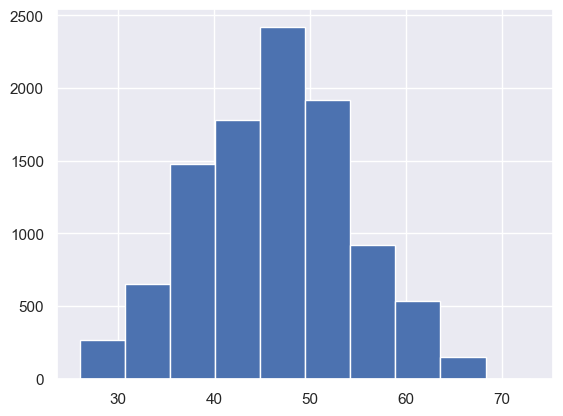

In [51]:
plt.hist(data['Customer_Age']);

`matplotlob` has many parameters you can use to customized this chart, but the most important one for histograms are `bins`. Bins are set to 10 by default and are a way to group the values together to allow a high level distribution to render. However, this is a good one to adjust if the bins are too coarse and are not allowing us to fully see the distribution. 

Based on our diagrams above, `Customer_Age` looks fairly normally distributed. Nice, this tells us that it's possible to find normally distributed data in the wild, which is good! To read this chart, the yaxis represents frequencies, or in this case Customers and the xaxis represents the age bins. So, approximately ~2400 customers are within 45-50. This is not meant to be an exact measure, but more an indication of the distribution. To get exact numbers, we will want to dig into the data, but this is our first step to guide us where to look.

Let's take a quick look at the distribution for `Months_on_book`. 

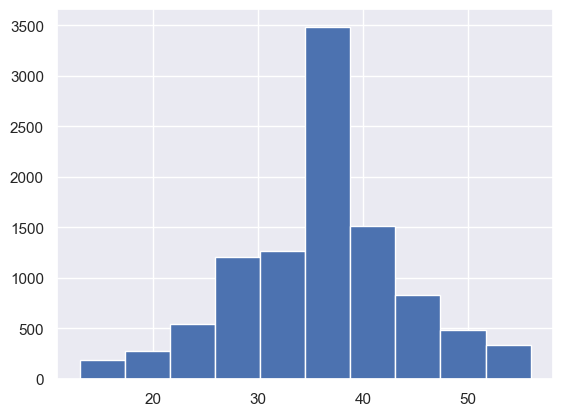

In [52]:
plt.hist(data['Months_on_book']);

It looks pretty normal outside of a very strong peak at ~36 months (roughly 3500 customers). If we had access to the owner to ask more questions about this, we would want to know if this was a **data error** (default months for those without a record), or if there was a major marketing campaign that brought in a lot of users 36 months ago. 

Now let's take a look at the `Credit_Limit` variable that we looked at before:

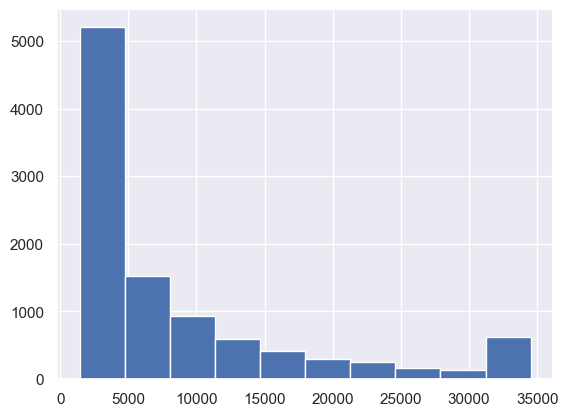

In [53]:
plt.hist(data['Credit_Limit']);

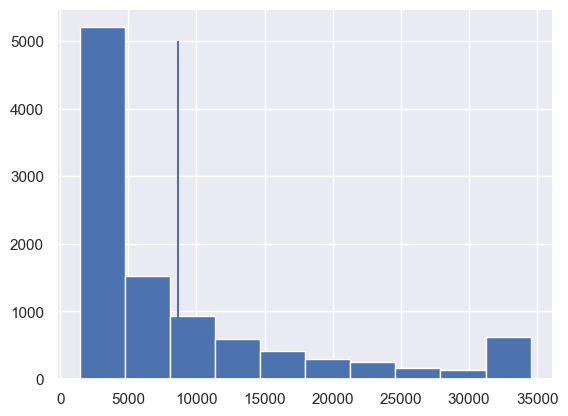

In [54]:
plt.hist(data['Credit_Limit']);
plt.vlines(data['Credit_Limit'].mean(), 0, 5000)
plt.vlines(data['Credit_Limit'].median(), 0, 5000) 

In [55]:
data['Credit_Limit'].median() # can't see the median line here...let's fix!

4549.0

Let's improve this visual a bit by increasing the `bin` size, changing the color of the lines and adding some annotations. Next, let's add a title and some x and y labels as well.  

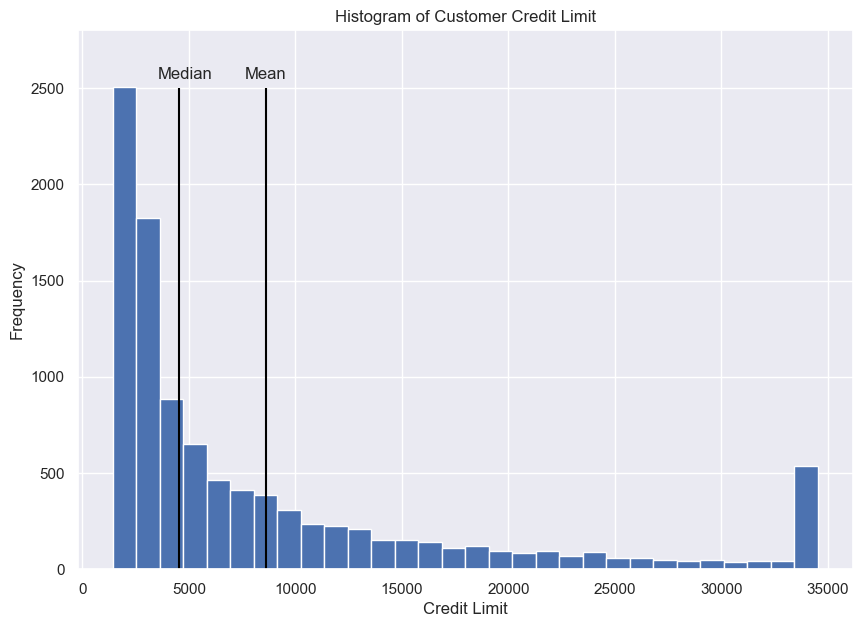

In [56]:
plt.figure(figsize=(10,7))
plt.hist(data['Credit_Limit'], bins=30);

plt.vlines(data['Credit_Limit'].mean(), 0, 2500, colors='Black')
plt.vlines(data['Credit_Limit'].median(), 0, 2500, colors='Black')
plt.text(data['Credit_Limit'].mean()-1000, 2500+50, "Mean")
plt.text(data['Credit_Limit'].median()-1000, 2500+50, "Median")
plt.ylim(0, 2800);
plt.title("Histogram of Customer Credit Limit");
plt.ylabel('Frequency');
plt.xlabel('Credit Limit');

**MUCH** better. Now, it's clear that this Credit Limit is a skewed variable, being skewed higher (or to the right) by a few customers with high Credit Limits. 

Based on its relation to our feet, we know this is **right skewed**. 

Let's try `Total_Trans_Ct` that looked to have a somewhat similar mean and median. 

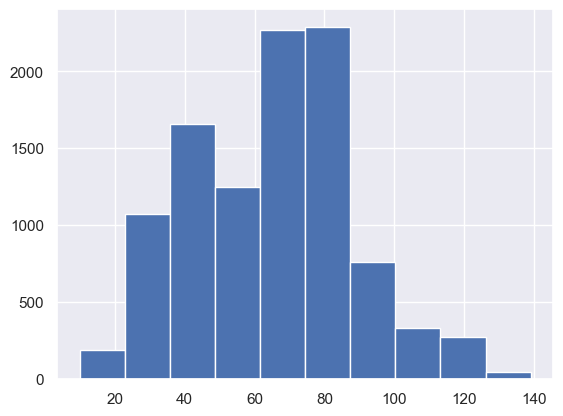

In [57]:
plt.hist(data['Total_Trans_Ct']);

It might not be obvious that this is a **bimodal** distribution, let's increase the bin size. Default is 10. Bimodal data typically will show two peaks of data-- which usually indicates you’ve got two different groups.

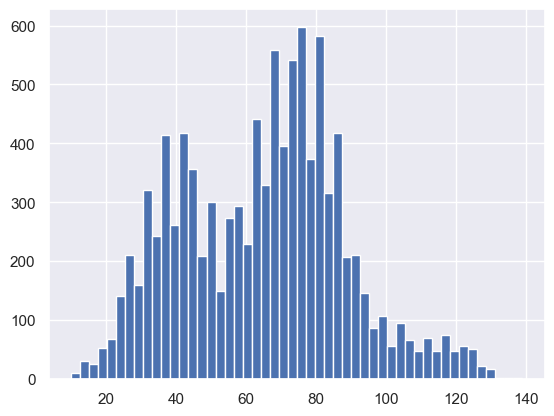

In [58]:
plt.hist(data['Total_Trans_Ct'], bins=50);

## Data Transformations: Normalization and Log

While we are still on the topic of distributions, it's important to note that there are simple ways to transform a skewed distribution into one that looks more "normal" or to normalize between two values. Let's take a look at a few together. 

We will cover two very common transformations:

    1) Normalization (also referred to as a min-max scaler): Normalization will convert all data points to values between two values (usually 0 and 1). 
    2) Log transformation: This helps make the data "less skewed". When using log with Python, the default base is usually e.
    
    
These transformations achieve very different results, as we will clearly see as we go through this. More about transformations [here](https://towardsdatascience.com/transforming-skewed-data-73da4c2d0d16#:~:text=Skewed%20data%20is%20cumbersome%20and,Root%20and%20the%20Hyperbolic%20Tangent.).

We will use the out of the box log transformation from the numpy library and write our own function for normalization.

In [60]:
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

In [61]:
data['Credit_Limit_Normalized'] = normalize(data['Credit_Limit'])
data['Credit_Limit_Log_Transformed'] = np.log(data['Credit_Limit'])

o see exactly how the transformations impact the variables we are looking at, we will use seaborn subplots to plot them side by side using `subplots`. You can read more about how to create subplots [here](https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8).

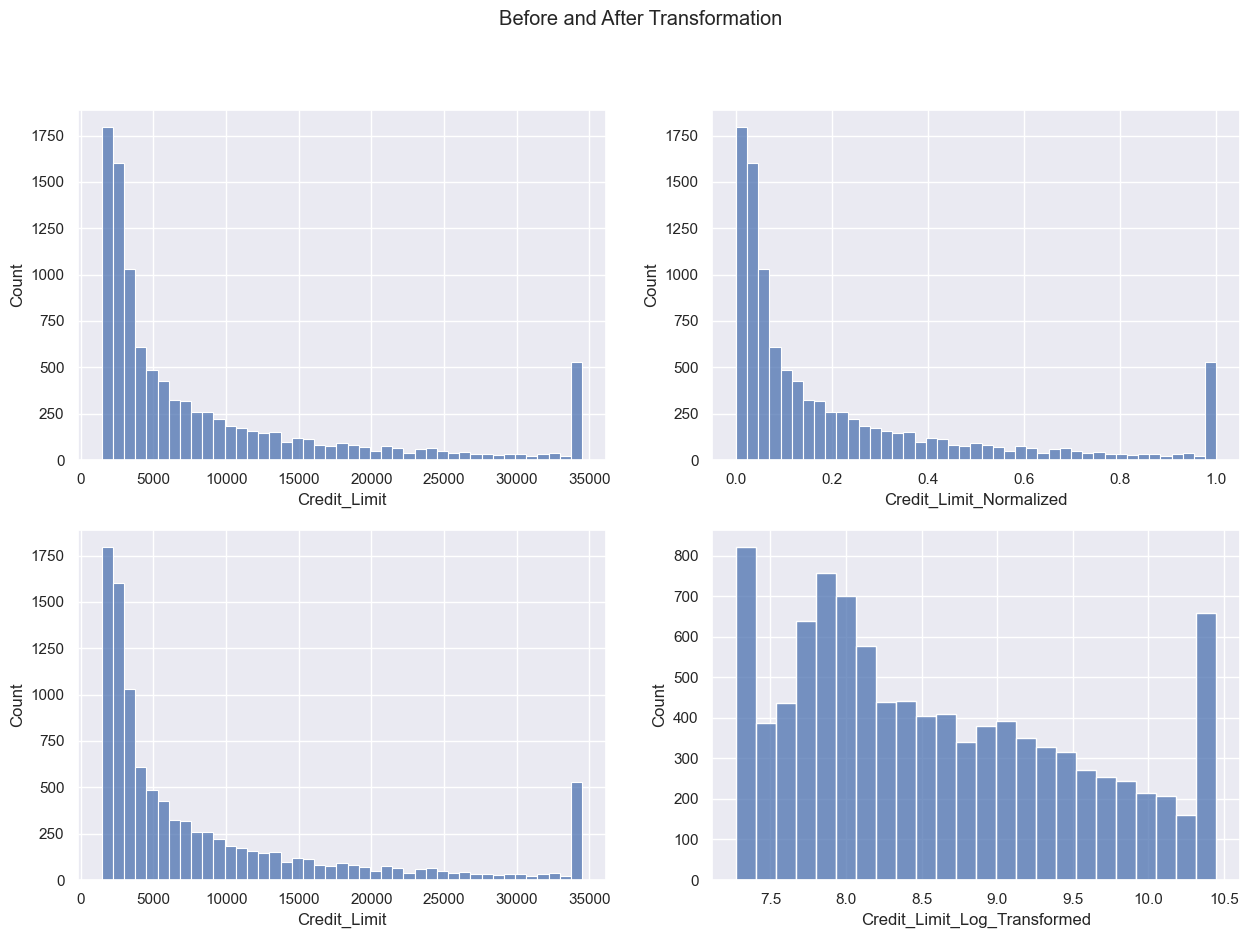

In [62]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))
fig.suptitle('Before and After Transformation')

#create boxplot in each subplot
sns.histplot(data, x="Credit_Limit", ax=axes[0,0])
sns.histplot(data, x="Credit_Limit_Normalized", ax=axes[0,1])
sns.histplot(data, x="Credit_Limit", ax=axes[1,0])
sns.histplot(data, x="Credit_Limit_Log_Transformed", ax=axes[1,1]);

As you can see above, when we **Normalized** the values, they maintained their shape but now are bound between 0 and 1. This method is helpful when comparing across many variables of different magnitudes (ex. Number of Relationships which ranges between 1-6 vs Credit Limit which ranges between 0 and 35K). 

However, it's clear that the **Log-Transformation** made an impact on the distribution!

## Other Distributions Plots

### Box and Wisker Plot

Other ways to look at distributions include Box and Whisker plots, Pyramid Chart, Candlestick charts, etc. We will review Box and Whisker and Pyramid Charts together. Let's look at Total Transaction Count by Gender on a **Box and Whisker Plot**. 

The box and whisker plot allows the analyst to quickly find and identify the median, quartiles and any outliers. 

<Axes: xlabel='Gender', ylabel='Total_Trans_Ct'>

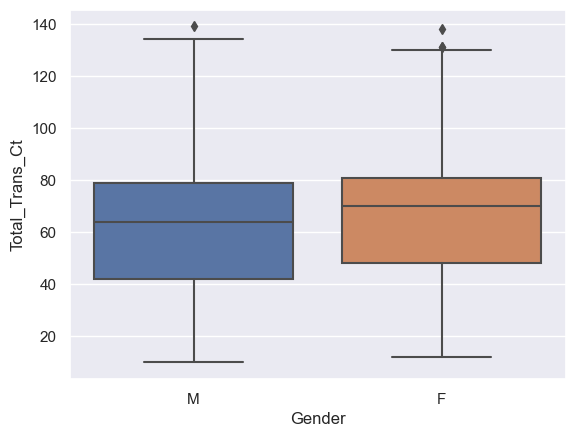

In [63]:
sns.boxplot(x=data["Gender"], y=data['Total_Trans_Ct'])

This plot quickly shows us that the median transaction account is slightly higher for females than males and outliers seem to be present among both groups.

### Pyramid Chart

What if the question we wanted to know is if there was a difference in the distribution of customers by age and gender? A Pyramid chart could get us there! 

Pyramid charts don't come out of the box in the matplolib or seaborn packages, so we will use Plotly, an interactive visualization package to pull this one off. There's a nice example we will follow [here](https://plotly.com/python/v3/population-pyramid-charts/). 

For this, we will need to prepare our data. Remember the `Customer_Age_bins` we made before? We will use them now. 

To get the data in the format we need, we will need to aggregate the data up to the Age and Gender level. I will do that now with this line of code and we will go over aggregations and groupbys later. For now, let's take a look at the output together. 

In [64]:
pyramid = data.groupby(['Gender', 'Customer_Age_bins'])['CLIENTNUM'].nunique().reset_index()

In [65]:
pyramid

Gender Customer_Age_bins  CLIENTNUM
0       F               20s         93
1       F               30s        956
2       F               40s       2410
3       F               50s       1619
4       F               60s        280
5       F               70s          0
6       M               20s        102
7       M               30s        885
8       M               40s       2151
9       M               50s       1379
10      M               60s        250
11      M               70s          2

With a few code line swaps to read in our dataset, we can create the following. **This is a small reminder to leverage what exists on the internet. A lot of work will be done for you, and the job will be to know how to find it and translate it for your use-case!**

In [66]:
women_bins = np.array(-1* pyramid[pyramid['Gender']=='F']['CLIENTNUM'])
men_bins = np.array(pyramid[pyramid['Gender']=='M']['CLIENTNUM'])

y = list(range(20, 100, 10))

layout = go.Layout(yaxis=go.layout.YAxis(title='Age'),
                   xaxis=go.layout.XAxis(
                       range=[-3000, 3000],
                       tickvals=[-2500,-2000,-1500,-1000,-500, 0, 500,1000,1500,2000,2500],
                       ticktext=[2500,2000,1500,1000,500, 0, 500,1000,1500,2000,2500],
                       title='Customers'),
                   barmode='overlay',
                   bargap=0.1)

p_data = [go.Bar(y=y,
               x=men_bins,
               orientation='h',
               name='Men',
#                text=men_bins.astype('int'),
               hoverinfo='x',
               marker=dict(color='powderblue')
               ),
        go.Bar(y=y,
               x=women_bins,
               orientation='h',
               name='Women',
               text=-1 * women_bins.astype('int'),
               hoverinfo='text',
               marker=dict(color='seagreen')
               )]

iplot(dict(data=p_data, layout=layout))

Here we see there is no real difference in the distribution of Customers by Age and Gender. The majority of customers are in their 40s--*a similar finding to the one earlier when we were looking at histograms.*

### Comparing Categories

Comparing histograms to bar charts, let's take a look at the same dimensions we used above (Age and Gender) and use a `barplot` to visualize these groups. The main difference here will be that we are **not looking at frequencies anymore**, we are specifying and plotting a measure of our choice. Here, we will look at `Credit_Limit` by Age and Gender. Let's plot! 

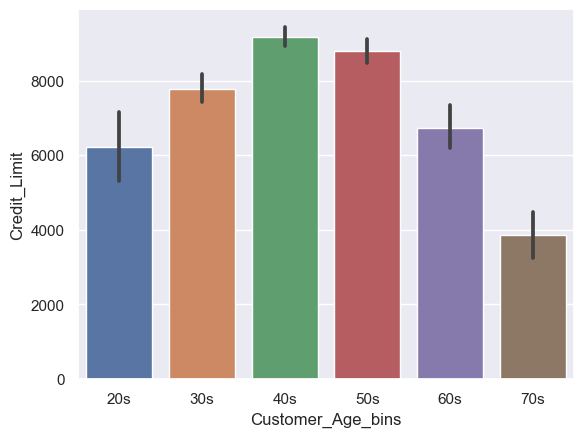

In [67]:
sns.barplot(x='Customer_Age_bins', y='Credit_Limit', data=data, estimator=np.mean);

Notice how I've passed through an estimator. When the data is given at the Customer level (not aggregated), then it will estimate the values for that group (the default is the mean, but we can switch that out). You'll notice `error bars` and this is to show that the bar height ends where the mean for that group is, but there are Customers with more or less, as dictated by the length of the error bar. 

Let's see what happens when we add in `Gender`, which we can do by specifying the `Hue`.

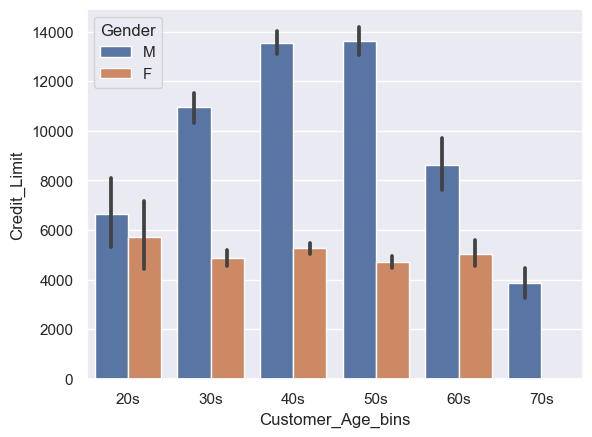

In [71]:
sns.barplot(x='Customer_Age_bins', y='Credit_Limit', hue='Gender', data=data, estimator=np.mean);

Notice how Females are getting credit limits much lower than Males! Interesting insight. Just to sanity check ourselves, let's try the median instead of the mean here. Let's swap that using the `estimator` parameter.

C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning:

Mean of empty slice.

C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning:

invalid value encountered in scalar divide



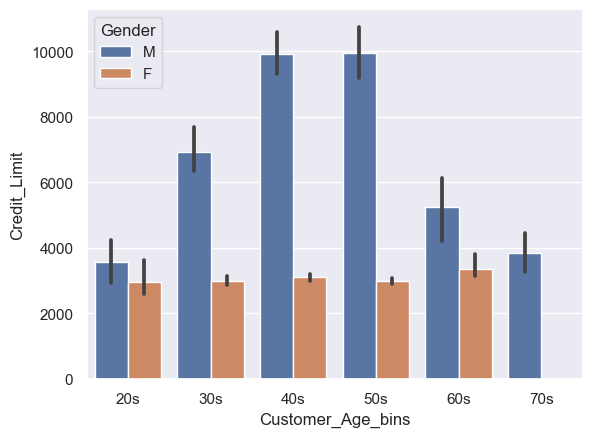

In [72]:
sns.barplot(x='Customer_Age_bins', y='Credit_Limit', hue='Gender', data=data, estimator=np.median);

Looks like it's true that men on average are getting accepted for much more than women are for our company. If we wanted a bar chart without the error bars, we would need to do a quick aggregation. Let's run the next line of code together and go over it in more detail in the next section. 

In [73]:
barplot = data.groupby(['Customer_Age_bins', 'Gender'])['Credit_Limit'].mean().reset_index()
barplot

Customer_Age_bins Gender  Credit_Limit
0                20s      F   5731.101075
1                20s      M   6649.367647
2                30s      F   4867.775314
3                30s      M  10948.605311
4                40s      F   5270.821784
5                40s      M  13557.484844
6                50s      F   4702.649475
7                50s      M  13635.717041
8                60s      F   5053.412857
9                60s      M   8626.832000
10               70s      F           NaN
11               70s      M   3860.500000

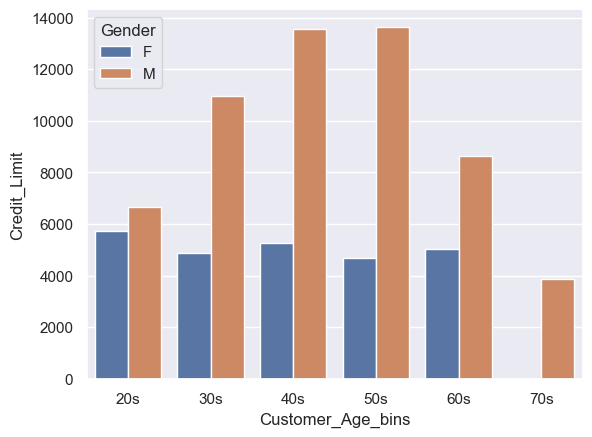

In [74]:
sns.barplot(x='Customer_Age_bins', y='Credit_Limit', hue='Gender', data=barplot);

We can turn the visual so that the bars go horizontally with just one parameter change. Let's try! Here we swap the default `orient` to "h".

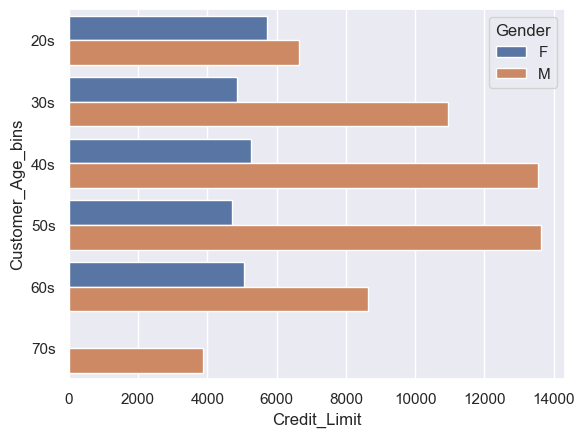

In [75]:
sns.barplot(x='Credit_Limit', y='Customer_Age_bins', hue='Gender', data=barplot, orient='h');

There are times where a bar chart may have too many categories that are too close to tell the difference between the heights. A small adaptation from the `Bar Chart` is the `Lollipop Chart`, let's make it together. 

In [76]:
lollipop = data.groupby(['Customer_Age_bins'])['Credit_Limit'].mean().reset_index().sort_values('Credit_Limit')
lollipop

Customer_Age_bins  Credit_Limit
5               70s   3860.500000
0               20s   6211.425128
4               60s   6738.987925
1               30s   7790.933677
3               50s   8811.622181
2               40s   9178.870949

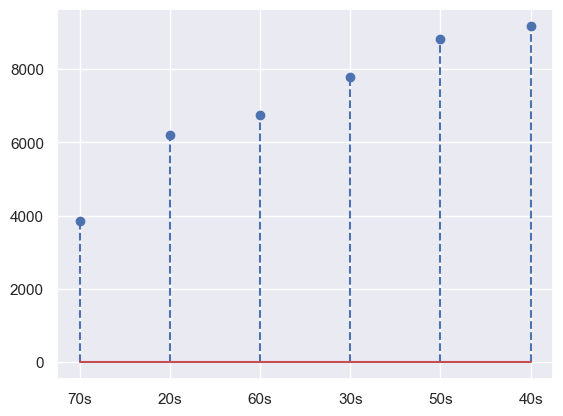

In [77]:
plt.stem(lollipop['Customer_Age_bins'], lollipop['Credit_Limit'], linefmt='--');

Most common, is to see this chart with the bars flowing **horizontally** and **sorted** from highest to lowest so we can visually pick up how the categories compare with one another. Otherwise they can be more confusing to read so use your best judgement on when to use them. We can do that here with the following code: 

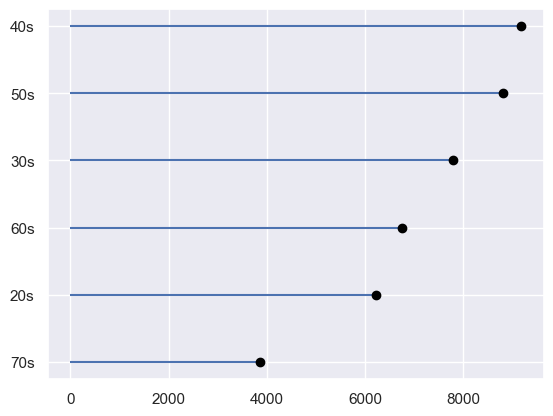

In [78]:
# https://jonathansoma.com/lede/foundations-2018/pandas/creating-lollipop-charts-with-pandas-and-matplotlib/
fig, ax = plt.subplots()
ax.hlines(lollipop['Customer_Age_bins'], xmin=0, xmax=lollipop['Credit_Limit'])
ax.plot(lollipop['Credit_Limit'], lollipop['Customer_Age_bins'], "o", color='black');

More inspiration for Lollipop charts can be found [here](https://www.tvhahn.com/posts/beautiful-plots-lollipop/)

## Data Visualization: Data Tables

**Aggregations and Groupby**: If you are familiar with `Pivot Tables` in excel, than the way that `.groupby()` works with pandas dataframes should be pretty intuative! What both of these functions will try to accomplish is aggregations and ways of summarizing the data. They are both flexible enough to allow you to pull in different aggregation types (sum, mean, counts, etc). To read more about the difference between `pivot tables` in python and `groupby`, see this [guide](https://levelup.gitconnected.com/pivot-tables-in-pandas-7b672e6d8f47).

**Aggregations and Groupby**: If you are familiar with `Pivot Tables` in excel, than the way that `.groupby()` works with pandas dataframes should be pretty intuative! What both of these functions will try to accomplish is aggregations and ways of summarizing the data. They are both flexible enough to allow you to pull in different aggregation types (sum, mean, counts, etc). To read more about the difference between `pivot tables` in python and `groupby`, see this [guide](https://levelup.gitconnected.com/pivot-tables-in-pandas-7b672e6d8f47).

In [79]:
data.groupby([ 'Attrition_Flag']).agg({
               'CLIENTNUM':'nunique',
               'Customer_Age': 'mean', 
               'Dependent_count': 'mean',
               'Months_on_book': 'mean',
               'Total_Relationship_Count': 'mean',
               'Months_Inactive_12_mon': 'mean',
               'Contacts_Count_12_mon': 'mean',
               'Credit_Limit': 'mean',
               'Total_Revolving_Bal': 'mean',
               'Avg_Open_To_Buy': 'mean',
               'Total_Amt_Chng_Q4_Q1': 'mean',
               'Total_Trans_Amt': 'mean',
               'Total_Trans_Ct': 'mean',
               'Total_Ct_Chng_Q4_Q1': 'mean',
               'Avg_Utilization_Ratio': 'mean'
            })

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
Attrition_Flag                                                                
Attrited Customer       1627     46.659496         2.402581       36.178242   
Existing Customer       8500     46.262118         2.335412       35.880588   

                   Total_Relationship_Count  Months_Inactive_12_mon  \
Attrition_Flag                                                        
Attrited Customer                  3.279656                2.693301   
Existing Customer                  3.914588                2.273765   

                   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
Attrition_Flag                                                                
Attrited Customer               2.972342   8136.039459           672.822987   
Existing Customer               2.356353   8726.877518          1256.604118   

                   Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
Attrition_Flag                                                              
Attrited Customer      7463.216472              0.694277      3095.025814   
Existing Customer      7470.273400              0.772510      4654.655882   

                   Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
Attrition_Flag                                                                 
Attrited Customer       44.933620             0.554386               0.162475  
Existing Customer       68.672588             0.742434               0.296412

To see the groups more clearly, we can use the `Transpose` function. This will swap Columns and Rows.

Styling a dataframe [guide](https://towardsdatascience.com/style-pandas-dataframe-like-a-master-6b02bf6468b0). Row-wise, [here](https://stackoverflow.com/questions/52783419/format-pandas-dataframe-row-wise)

In [84]:
data_pivot = data.groupby(['Attrition_Flag']).agg({
                           'CLIENTNUM':'nunique', # number of unique customers in each group
                           'Customer_Age': 'mean', # the rest are looking at the mean per group
                           'Dependent_count': 'mean',
                           'Months_on_book': 'mean',
                           'Total_Relationship_Count': 'mean',
                           'Months_Inactive_12_mon': 'mean',
                           'Contacts_Count_12_mon': 'mean',
                           'Credit_Limit': 'mean',
                           'Total_Revolving_Bal': 'mean',
                           'Avg_Open_To_Buy': 'mean',
                           'Total_Amt_Chng_Q4_Q1': 'mean',
                           'Total_Trans_Amt': 'mean',
                           'Total_Trans_Ct': 'mean',
                           'Total_Ct_Chng_Q4_Q1': 'mean',
                           'Avg_Utilization_Ratio': 'mean'
                        }).T

data_pivot

Attrition_Flag            Attrited Customer  Existing Customer
CLIENTNUM                       1627.000000        8500.000000
Customer_Age                      46.659496          46.262118
Dependent_count                    2.402581           2.335412
Months_on_book                    36.178242          35.880588
Total_Relationship_Count           3.279656           3.914588
Months_Inactive_12_mon             2.693301           2.273765
Contacts_Count_12_mon              2.972342           2.356353
Credit_Limit                    8136.039459        8726.877518
Total_Revolving_Bal              672.822987        1256.604118
Avg_Open_To_Buy                 7463.216472        7470.273400
Total_Amt_Chng_Q4_Q1               0.694277           0.772510
Total_Trans_Amt                 3095.025814        4654.655882
Total_Trans_Ct                    44.933620          68.672588
Total_Ct_Chng_Q4_Q1                0.554386           0.742434
Avg_Utilization_Ratio              0.162475           0.296412

Instead of trying to understand the differences by visual inspection, let's calculate the differences between groups and sort to see where they differ the most.

In [85]:
data_pivot['Diff'] = data_pivot['Attrited Customer'] / data_pivot['Existing Customer'] - 1

data_pivot.sort_values('Diff')

Attrition_Flag            Attrited Customer  Existing Customer      Diff
CLIENTNUM                       1627.000000        8500.000000 -0.808588
Total_Revolving_Bal              672.822987        1256.604118 -0.464570
Avg_Utilization_Ratio              0.162475           0.296412 -0.451860
Total_Trans_Ct                    44.933620          68.672588 -0.345683
Total_Trans_Amt                 3095.025814        4654.655882 -0.335069
Total_Ct_Chng_Q4_Q1                0.554386           0.742434 -0.253286
Total_Relationship_Count           3.279656           3.914588 -0.162196
Total_Amt_Chng_Q4_Q1               0.694277           0.772510 -0.101271
Credit_Limit                    8136.039459        8726.877518 -0.067703
Avg_Open_To_Buy                 7463.216472        7470.273400 -0.000945
Months_on_book                    36.178242          35.880588  0.008296
Customer_Age                      46.659496          46.262118  0.008590
Dependent_count                    2.402581           2.335412  0.028761
Months_Inactive_12_mon             2.693301           2.273765  0.184512
Contacts_Count_12_mon              2.972342           2.356353  0.261416

We can see that the `Total_Revolving_Bal` and `Avg_Utilization_Ratio` along with `Total_Trans_Ct` and `Total_Trans_Amt` show the biggest differences, all showing 30% or more below Existing Customers. 

## Relationships

The next thing we may be interested in is how variables move with (positively correlated) or against (negatively correlated) each other. We can do this quickly for the whole numerical dataset (or a subset) using a [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) or [pairgrid](https://seaborn.pydata.org/generated/seaborn.PairGrid.html#seaborn.PairGrid). 


This is a nice visualization since it will show relationships between each numerical variable and every other one in the dataset as well as histograms along the diagonal.

When thinking about correlation, there can be several outcomes: 

    1) Weak, strong or no correlation
    2) Positive or negative
    
Thus, you can have weak (or strong) positive, weak (or strong) negative, or no correlation. Scatter plots along with a correlation coefficient can help us understand this relationship more. 

**Remember**: Correlation does not imply causation. 

[Link] https://commons.wikimedia.org/wiki/File:Strong--weak--no-correlation.png

Before running our entire dataset through a pairplot, we will simplify to just the numerical data. 

In [87]:
# https://stackoverflow.com/questions/25039626/how-do-i-find-numeric-columns-in-pandas
numeric_data = data._get_numeric_data()

In [88]:
numeric_data.columns

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Credit_Limit_Normalized', 'Credit_Limit_Log_Transformed'],
      dtype='object')

Since this is a computationally expensive operation, and we will not gain new information from some of these variables (like CLLIENTNUM) we will simplify even further. 

In [89]:
numeric_data = data[['Credit_Limit', 'Total_Revolving_Bal', 'Months_on_book',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Attrition_Flag']]

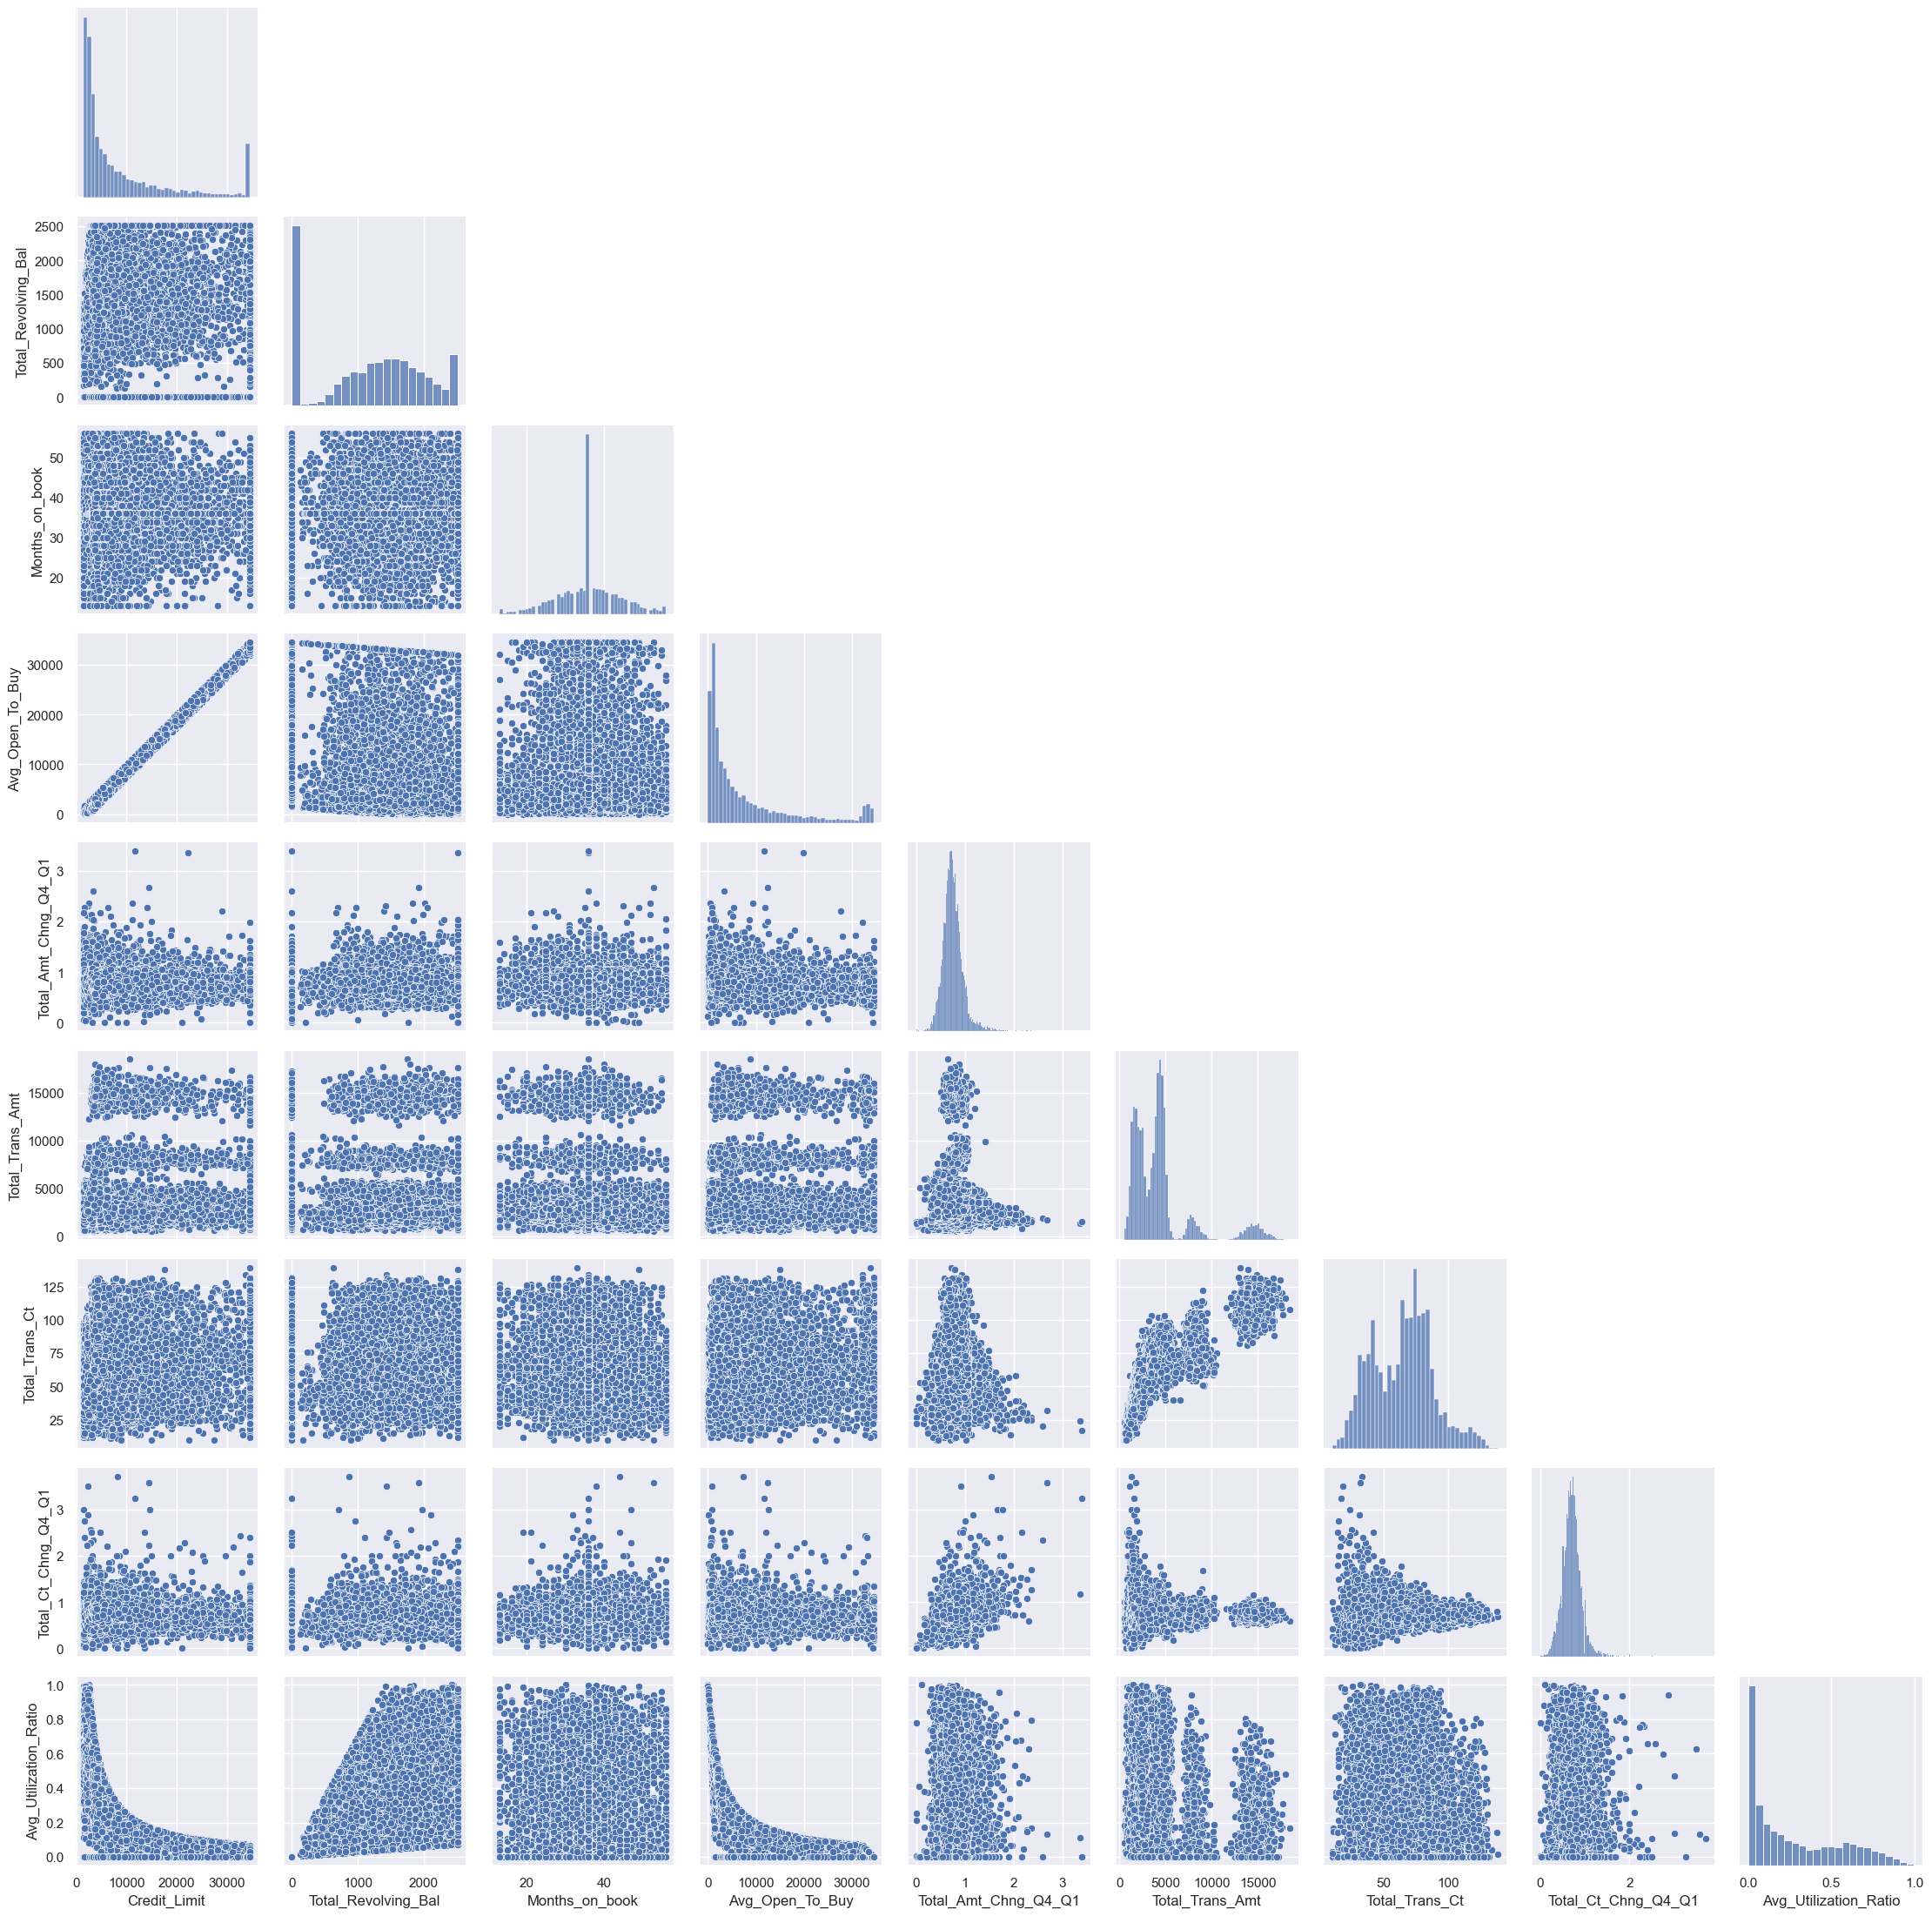

In [90]:
g = sns.PairGrid(numeric_data, diag_sharey=False, corner=True)
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot)

Let's double click into one of these scatter plots that looks interesting. The one with `Total_Trans_Amt` and `Total_Trans_Ct`.

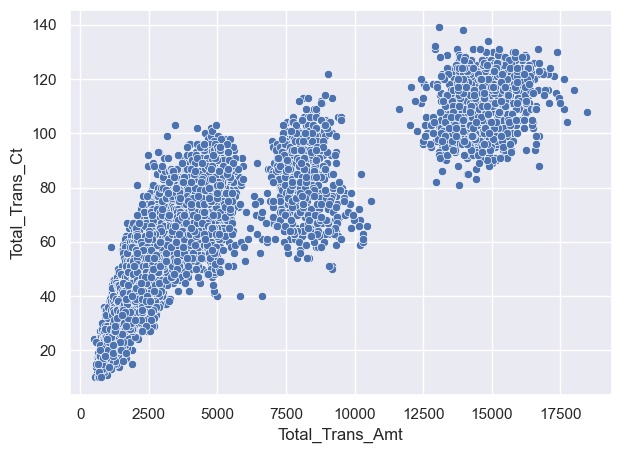

In [91]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Total_Trans_Amt', y='Total_Trans_Ct', data=data);

This plot clearly shows three distinct groups! Let's see if anything shows up when we add the `Attrition_Flag` as a **Hue**.

<Axes: xlabel='Total_Trans_Amt', ylabel='Total_Trans_Ct'>

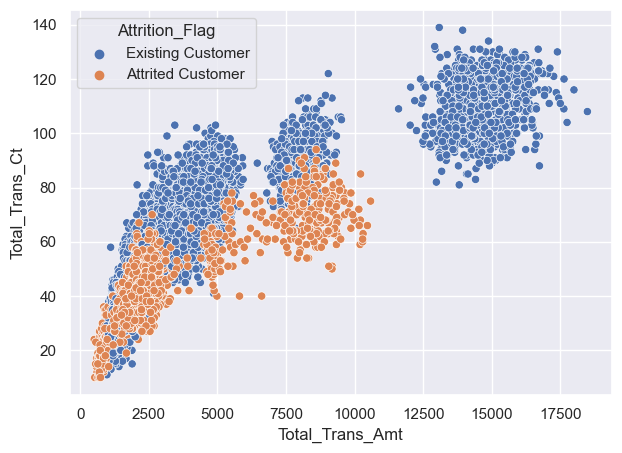

In [92]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Total_Trans_Amt', y='Total_Trans_Ct', data=data, hue='Attrition_Flag')

Looks like the top group doesn't have a single attrited customer! And that number looks to be around $11K.

**Finding #1: No attrited customer above $11K of spend**

## Ridge Plot

We've seen that there are no customers who have churned that have spent **$11K or more**, let's use our knowledge of how to create bins and separate these groups from each other so we can effectively look at their differences.

In [93]:
bins = [0, 11000, 900000]
labels = ['Group 1', 'Group 2']
data['Total_Trans_Amt_bin'] = pd.cut(data['Total_Trans_Amt'], bins=bins, labels=labels, include_lowest=True, right=False)

In [94]:
data.groupby(['Total_Trans_Amt_bin', 'Attrition_Flag']).agg({
     'CLIENTNUM':'nunique',
    'Customer_Age': 'mean', 
    'Dependent_count': 'mean',
    'Months_on_book': 'mean',
    'Total_Relationship_Count': 'mean',
    'Months_Inactive_12_mon': 'mean',
    'Contacts_Count_12_mon': 'mean',
    'Credit_Limit': 'mean',
    'Total_Revolving_Bal': 'mean',
    'Avg_Open_To_Buy': 'mean',
    'Total_Amt_Chng_Q4_Q1': 'mean',
    'Total_Trans_Amt': 'mean',
    'Total_Trans_Ct': 'mean',
    'Total_Ct_Chng_Q4_Q1': 'mean',
    'Avg_Utilization_Ratio': 'mean'
}).T

Total_Trans_Amt_bin                Group 1                    \
Attrition_Flag           Attrited Customer Existing Customer   
CLIENTNUM                      1627.000000       7753.000000   
Customer_Age                     46.659496         46.373920   
Dependent_count                   2.402581          2.341545   
Months_on_book                   36.178242         35.964272   
Total_Relationship_Count          3.279656          4.064620   
Months_Inactive_12_mon            2.693301          2.279376   
Contacts_Count_12_mon             2.972342          2.369018   
Credit_Limit                   8136.039459       8213.629808   
Total_Revolving_Bal             672.822987       1245.908165   
Avg_Open_To_Buy                7463.216472       6967.721643   
Total_Amt_Chng_Q4_Q1              0.694277          0.772248   
Total_Trans_Amt                3095.025814       3686.943506   
Total_Trans_Ct                   44.933620         64.658326   
Total_Ct_Chng_Q4_Q1               0.554386          0.741687   
Avg_Utilization_Ratio             0.162475          0.307600   

Total_Trans_Amt_bin                Group 2                    
Attrition_Flag           Attrited Customer Existing Customer  
CLIENTNUM                              0.0        747.000000  
Customer_Age                           NaN         45.101740  
Dependent_count                        NaN          2.271754  
Months_on_book                         NaN         35.012048  
Total_Relationship_Count               NaN          2.357430  
Months_Inactive_12_mon                 NaN          2.215529  
Contacts_Count_12_mon                  NaN          2.224900  
Credit_Limit                           NaN      14053.797858  
Total_Revolving_Bal                    NaN       1367.615797  
Avg_Open_To_Buy                        NaN      12686.182062  
Total_Amt_Chng_Q4_Q1                   NaN          0.775229  
Total_Trans_Amt                        NaN      14698.396252  
Total_Trans_Ct                         NaN        110.336011  
Total_Ct_Chng_Q4_Q1                    NaN          0.750190  
Avg_Utilization_Ratio                  NaN          0.180288

Earlier, we had highlighted the following variables that showed differences between Churned and Existing customers:

    1) Total_Revolving_Bal (still a good indicator)
    2) Avg_Utilization_Ratio (not good anymore, since attrited and existing have similar values)
    3) Total_Trans_Ct (still a good indicator)
    4) Total_Trans_Amt (not good anymore, since attrited and existing have similar values)


But also notice how the Q4-Q1 change is significantly different for Churned customers too! This indicates that churned customers are spending significantly less (-25% lower than their counterparts) after the holiday season, pulling back much more sigificantly. This is something we can probably build a recommendation off of. If we can impact this variable, we can also directly impact the `Total_Trans_Ct`! 

We will use `seaborn`'s `FacetGrid` method to allow us to build this subplot and use a `Kernal Density Plot` (which is just a continuous or smoother distribution of our original hisograms). More about KDE plots, see [here](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) and [here](https://seaborn.pydata.org/tutorial/distributions.html#tutorial-kde).

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



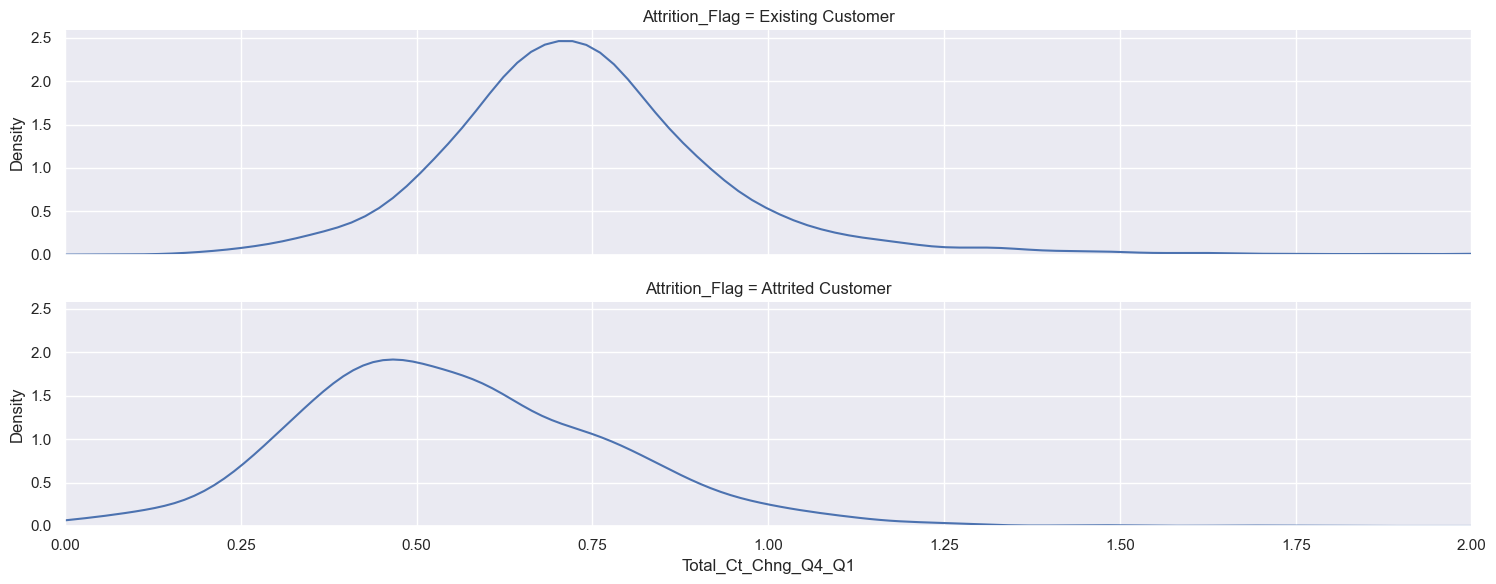

In [95]:
g = sns.FacetGrid(data, row="Attrition_Flag", aspect=5, height=3)
g.map_dataframe(sns.kdeplot, x="Total_Ct_Chng_Q4_Q1")

plt.xlim(0,2);

We will improve this visualization, implementing visual best practices in the next chapter of this course. 

## Putting it All Together

Let's start to declutter our final scatterplot and start by doing the following: 

    1) Changing the background color to white (effectively removing the gridlines)
    2) Removing the border

In [96]:
sns.set_theme(style="white")
palette = sns.color_palette("Set2", 12)

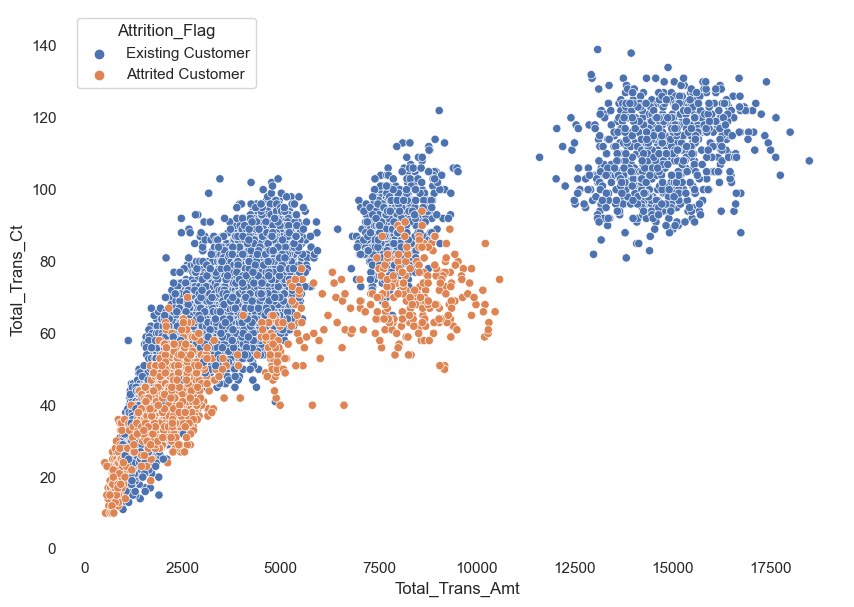

In [97]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='Total_Trans_Amt', y='Total_Trans_Ct', data=data, hue='Attrition_Flag')

sns.despine(bottom = True, left = True) # removes the border
plt.ylim(0, 150); # changes the limits of the yaxis

Let's now **edit** our `x` and `y` labels to make them more readable and **add** in a `title`.

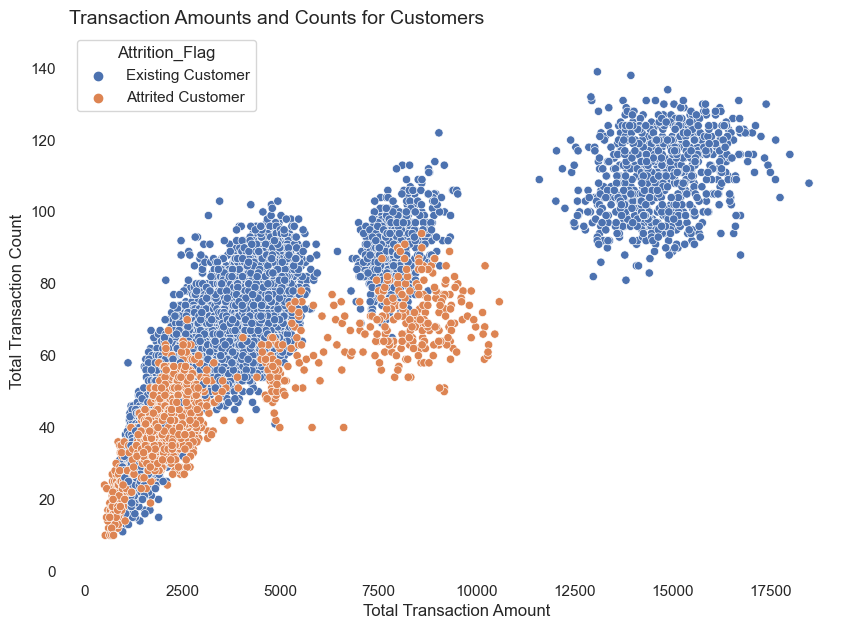

In [98]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='Total_Trans_Amt', y='Total_Trans_Ct', data=data, hue='Attrition_Flag')

sns.despine(bottom = True, left = True) # removes the border
plt.ylim(0, 150) # changes the limits of the yaxis

plt.xlabel('Total Transaction Amount') # axis labels
plt.ylabel('Total Transaction Count') # axis labels
plt.title("Transaction Amounts and Counts for Customers", loc='left', size=14); # title

Lastly let's add in a vertical line to separate the two groups and annotate to guide the reader as to what the insight we want them to takeaway.

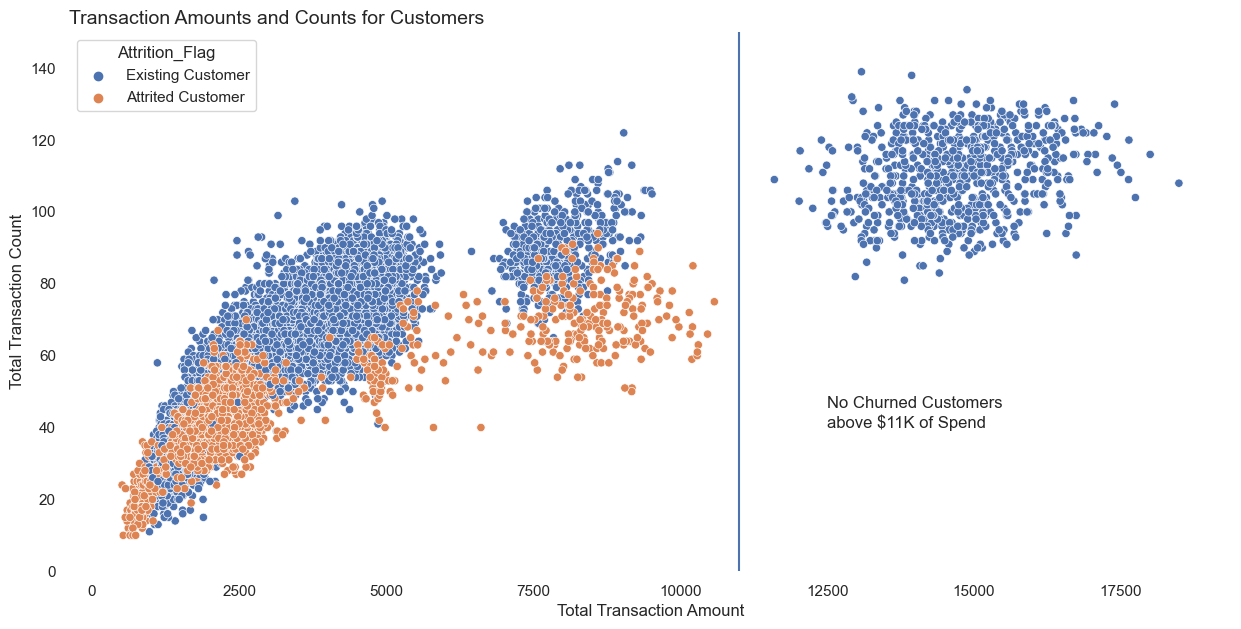

In [99]:
plt.figure(figsize=(15,7))
sns.scatterplot(x='Total_Trans_Amt', y='Total_Trans_Ct', data=data, hue='Attrition_Flag')

sns.despine(bottom = True, left = True) # removes the border
plt.ylim(0, 150) # changes the limits of the yaxis

plt.xlabel('Total Transaction Amount') # axis labels
plt.ylabel('Total Transaction Count') # axis labels
plt.title("Transaction Amounts and Counts for Customers", loc='left', size=14) # title

plt.vlines(11000,0,150) # adds in a vertical line at the $11k mark
plt.text(12500, 40, "No Churned Customers \nabove $11K of Spend"); # annotation

Nice! This looks much better! 

Let's do the same thing with our `Kernal Density Plots`, but you'll see how we tranfrom them into `Ridge Plots`. Reference [here](https://python.plainenglish.io/ridge-plots-with-pythons-seaborn-4de5725881af).

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



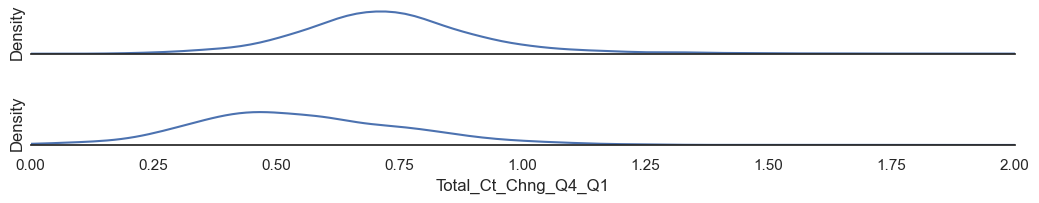

In [100]:
sns.set_theme(style="white")
g = sns.FacetGrid(data, row="Attrition_Flag", aspect=9, height=1.2)
g.map_dataframe(sns.kdeplot, x="Total_Ct_Chng_Q4_Q1")
g.set_titles("")
g.set(yticks=[])
g.despine(left=True)
plt.xlim(0,2);

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



(0.0, 2.0)

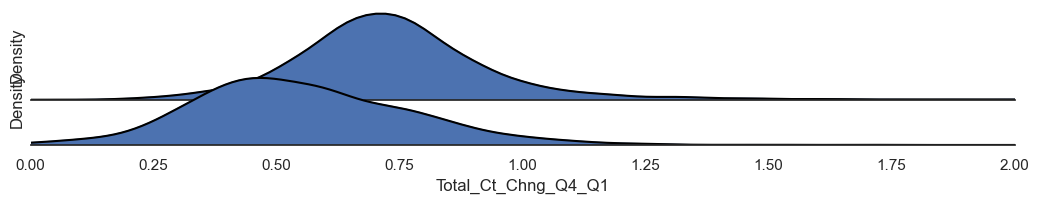

In [101]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
g = sns.FacetGrid(data, row="Attrition_Flag", aspect=9, height=1.2)
g.map_dataframe(sns.kdeplot, x="Total_Ct_Chng_Q4_Q1", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="Total_Ct_Chng_Q4_Q1", color='black')
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[])
g.despine(left=True)

plt.xlim(0,2)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



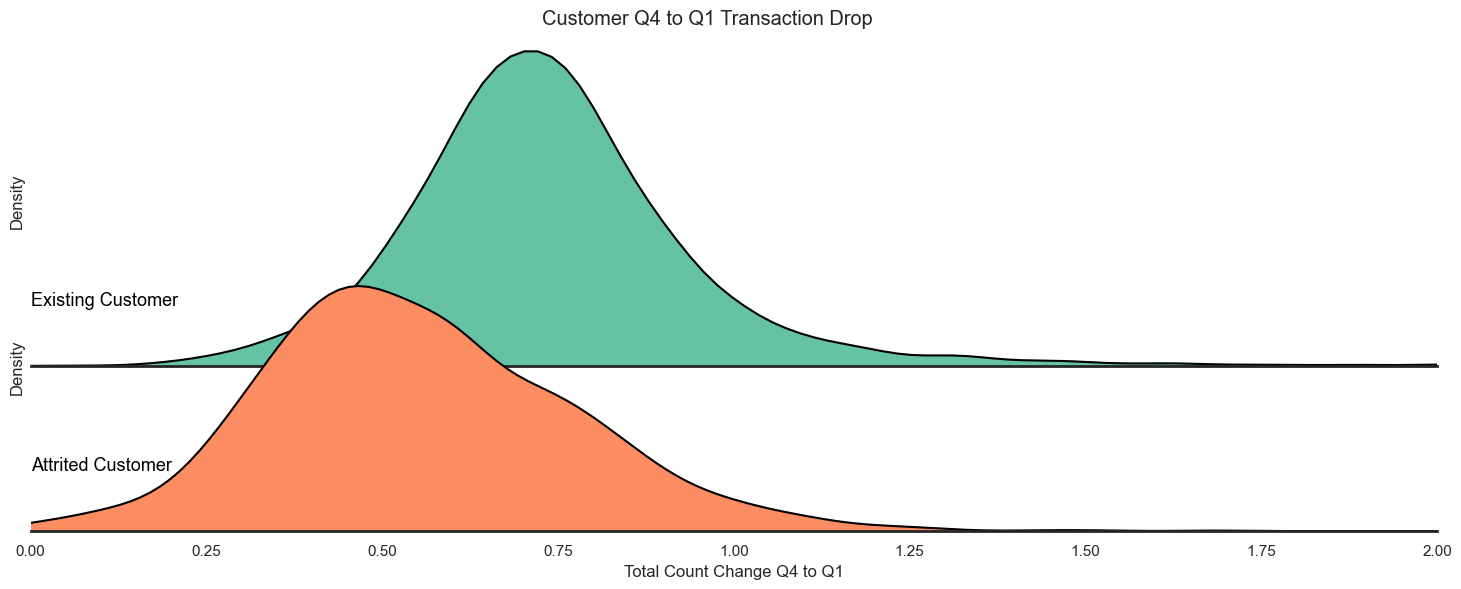

In [102]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("Set2", 12)
g = sns.FacetGrid(data, palette=palette, row="Attrition_Flag", hue="Attrition_Flag", aspect=5, height=3)
g.map_dataframe(sns.kdeplot, x="Total_Ct_Chng_Q4_Q1", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="Total_Ct_Chng_Q4_Q1", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
    
g.map(label, "Attrition_Flag")
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[], xlabel="Total Count Change Q4 to Q1")
g.despine(left=True)
plt.suptitle('Customer Q4 to Q1 Transaction Drop', y=0.98)

plt.xlim(0,2);

Recommendation: Promotions during Q1 time to keep the spending levels high. 

Theory: the more you spend the more attached you feel to the card, it's benefits, etc. A "prevent the cliff" campaign where all customers who have historically shown a strong drop off, will get targeted with this promo.

Some additional data points we will need for our slides

In [103]:
# maintain these customers
data[(data['Total_Trans_Amt_bin']=='Group 1') & 
     (data['Total_Ct_Chng_Q4_Q1']<0.70) & 
     (data['Attrition_Flag']=='Existing Customer')
    ]['CLIENTNUM'].nunique()

3535

In [104]:
# reengage
data[(data['Total_Trans_Amt_bin']=='Group 1') & 
     (data['Total_Ct_Chng_Q4_Q1']<0.70) & 
     (data['Attrition_Flag']!='Existing Customer')
    ]['CLIENTNUM'].nunique()

1233

Re-engagement campaign for those who left to bring them back. And insentives for those who are seeing a significant drop in Q4 to Q1 spend.

In [105]:
data.groupby('Total_Trans_Amt_bin')['Months_on_book'].median()

Total_Trans_Amt_bin
Group 1    36.0
Group 2    36.0
Name: Months_on_book, dtype: float64